### Kelly criterion for continuous variables

In this notebook we will see an introduction for the Kelly criterion for continuous variables and it's uses for the stock market.

It's mainly separated in 4 parts:

1. **Introduction to Kelly criterion for continuous variables.**


2. **Example with one security, we will use the S&P500.**


3. **Example with multiple securities.**


4. **Discusison, problems and further analysis.**

### 1. Introduction to Kelly criterion for continuous variables

First of all, the Kelly criterion is a broad topic, and there has being many papers and books about it, here I will just focus on some of the main relevant aspects for the Kelly criterion with continuous variables, hopefully I will make more chapters about it. Personally, I find the kelly criterion fascinating for it's simplicity, elegance and utility.

We saw in a previous [post](https://quantdare.com/kelly-criterion/) some of it's main characteristics for both discrete and continuous variables. Here we will get more deeply in this last one. 

- **Background**


The Kelly criterion is a very usefull method for betting sizing and investment allocation and it has being used for many succesfuls investors in history, such [Edward O. Thorp](https://en.wikipedia.org/wiki/Edward_O._Thorp), [Bill Gross](https://en.wikipedia.org/wiki/Bill_H._Gross)....

One of the first problems that we have from history related bet size was the [St. Petersburg paradox](https://en.wikipedia.org/wiki/St._Petersburg_paradox), invented by Nicolas Bernoulli in 1713, casually [Daniels Bernoulli](https://en.wikipedia.org/wiki/Daniel_Bernoulli) cousing, who later discovered the solution. This problem tries to find out the betting size for an infinite expected payoff. 

The kelly criterion was first described by [Jhon Kelly](https://en.wikipedia.org/wiki/John_Larry_Kelly_Jr.), in 1956, in his paper *A new interpretation of information rate*. He got his idea from his collegue [Shannon](https://en.wikipedia.org/wiki/Claude_Shannon), also know as the father of information theory. In his book *Fortune's Formula: The Untold Story of the Scientific Betting System That Beat the Casinos and Wall Street.* William Poundstone tells how both Shannon and the mathematician Edward Thorp used the Kelly criterion to win in the casinos and in the stock market. 

- **Continuous variables**


"*The kelly criterion maximizes the expected value of the logarithm of wealth period by period.*" And it can be used in any scenario where there is a probability of return/payoff for a given investment/bet. 

Before we start, applying the Kelly criterion, I have written some of the main equations that leads to the final optimal price allocation, for anyone who would like to understand a little bit more how it works. Nevertheless, feel free to skip this part!


- **Solving the problem**


Let's suppose that we have a security with an average return $m$ and a variance $s^2$. If we assume that the returns follow a normal distribution, we have that:

\begin{equation}
P(X = m  + s) = P(X = m - s) = 0.5
\end{equation}

Having an initial capital of $V_0$, a given allocation $f$ and a risk-free return (for example, treasury bills) $r$ we have:

\begin{equation}
V(f) = V_0(1 + (1 - f)r + fX)
\end{equation}

Or what is the same:

\begin{equation}
V(f) = V_0(1 + r + f(X - r))
\end{equation}

If we calculate the expected logarithm returns of $V(f)/V_0$ then:

\begin{equation}
g(f) = E[log(\frac{V(f)}{V_0})) = 0.5log(1 + r + f(m - r + s)) + 0.5log(1 + r + f(m - r - s)]
\end{equation}

Now, instead of having a single X (return) we will have n separate independent X's with it's corresponding mean and variance $(\frac{\mu}{n}, \frac{\sigma^2}{n})$, from where we get:

\begin{equation}
P(X_i = \frac{m}{n} + \frac{\sigma}{\sqrt{n}}) = P(X_i = \frac{m}{n} - \frac{\sigma}{\sqrt{n}}) = 0.5
\end{equation}

So:

\begin{equation}
\frac{V_n(f)}{V_0} = \prod_{i=1}^n(1 + \frac{r}{n} + f(X_i - \frac{m}{n}))
\end{equation}

Since we want to get the expected value of the logarithm of the returns:

\begin{equation}
E[log(\frac{V_n(f)}{V_0})] = nE[log(1 + \frac{r}{n} + f(X_i - \frac{m}{n}))]
\end{equation}

Now, we can do a small trick to expand the serie.

We know that:

\begin{equation}
log(1 + z) = z - \frac{z^2}{2} + \frac{z^3}{3} + ... + \frac{z^n}{n} 
\end{equation}

Since $z$ is equal to:

\begin{equation}
z = \frac{r}{n} + f(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n})
\end{equation}

Then $z^2$ will be 

\begin{equation}
z^2 = \frac{r^2}{n^2} + f^2(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n})^2 + 2\frac{r}{n}f(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n})
\end{equation}

Since we are not interest in smaller terms than $O(\frac{1}{\sqrt{n}n})$ from $z^2$ we will only use $\frac{f^2U^2s^2}{2n}$, so:

\begin{equation}
\frac{g(f)}{n} = E[\frac{r}{n} + f(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n}) + \frac{f^2U^2s^2}{2n} + O(\frac{1}{n\sqrt{n}})]
\end{equation}



We know that $U = \pm 1$ is a simetric Bernoulli with $E[U]=0$ amd $E[U^2]=1$ so finally we have our equation of wealth:

\begin{equation}
g(f) = r + f(m - r) + \frac{f^2s^2}{2} + O(\frac{1}{n\sqrt{n}})
\end{equation}

As $n \to \infty$ we will only have:

\begin{equation}
g(f) = r + f(m - r) + \frac{f^2s^2}{2}
\end{equation}

If we maximize $g(f)$ we have that:

\begin{equation}
f^* = \frac{m - r}{s^2}
\end{equation}


This can be familiar to you, since is similar to the well known [sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio), but instead of dividing it by the standard deviation you divide it by the variance. 

So to resume the value $f^*$ will be the fraction of our money that we should invest in a specific security.
And maybe you are asking yourself the same question, what if $m > r + s^2$ this is $f^* > 1$? Then you will have to leverage. When $m < r + s^2$ we will invest $1 - f^*$ in treasury bill. For our study we will asumme that if $f^*<0$ then we will invest all in treasury bills.



#### What if we have a portfolio of securities?

Note that, until now we have just talked about one security, but it can be extendend to multiple assets. Here we get that there is a fraction invested in each security

\begin{equation}
f_0 + ... + f_n = 1
\end{equation}

So the optimal fraction invested in each security is determined by:

\begin{equation}
F^* = C^{-1}(M - R)
\end{equation}

Where $C^{-1}$ is the covariance matrix. Note that, if the securities are uncorrelated then:

\begin{equation}
f_i^* = \frac{m_i - r}{s_i^2}
\end{equation}

Which is the same as the previous solution when we had just one security.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import (
    get_kelly, filter_leverage, get_cumulative_returns
)

**Prior problems**


There are some problems regarding the main assumptions made to find the optimal allocation. Such as assuming lognormality or stationary process.

One of the problems we can face is that we have neither the real $m$ nor the real $s^2$, which is normal taking into account that the financial time series rarely are stationary. So we will have to aproximate it.

To do so, I have selected the expanding mean and variance as the best estimators of $m$ and $s^2$ respectively

**Asumptions**

For simplicity, in our we are going to assume the following: 

1. First, we live in a perfect world without comissions, transactions costs or taxes.

3. Second, we cannot shortsell. 

4. Third, our trades don't alter the market (maybe Soros wouldn't agree with this idea).

#### 2. Example with one security (S&P500)

For the first case study we will select the S&P500, and compare results between using the Kelly criterion or just allocating always the same portion (equivalent to a constant $f^*=1$)

In [2]:
sp500 = pd.read_csv('sp500.csv', index_col='date', sep=";")

returns_sp500 = sp500['sp500'].pct_change()
shift_returns_sp500 = returns_sp500.shift(-1)

In [4]:
expanding_kelly = get_kelly(returns_sp500)
expanding_kelly = expanding_kelly.dropna()

first_date = expanding_kelly.index[0]

As we can see in the following graph the optimal $f^*$ has evolve during time. Note that sometimes, mostly at the begining it reaches values greater that 4. Which mean we would need to leverage $x4$! THis can be really risky and is a problem that has already being discusses in other [studies](https://www.stat.berkeley.edu/~aldous/157/Papers/Good_Bad_Kelly.pdf). 

C:\Users\Javier\Anaconda3\envs\thesis\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Kelly optimal $f^*$ evolution')

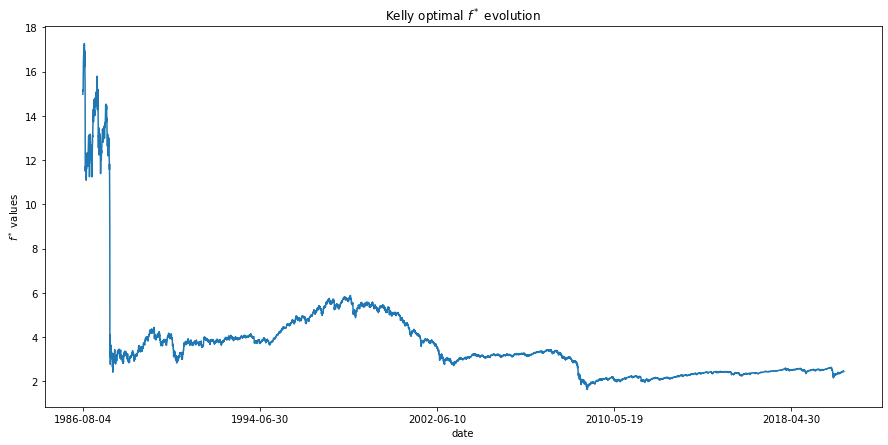

In [5]:
expanding_kelly.plot(figsize=(15, 7))
plt.ylabel('$f^*$ values')
plt.title('Kelly optimal $f^*$ evolution')

In the following graph we can see the "*predictive power*". As we can see greater greater Kelly ratios do not imply greater returns for the following day.

<AxesSubplot:xlabel='kelly', ylabel='Next day return'>

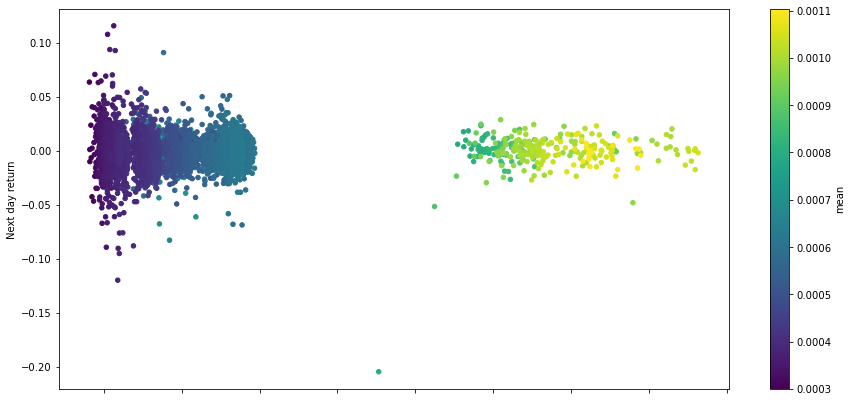

In [6]:
parameters_df = pd.DataFrame()
parameters_df['kelly'] = expanding_kelly
parameters_df['Next day return'] = shift_returns_sp500
parameters_df['mean'] = returns_sp500.expanding(400).mean() 

parameters_df.plot.scatter(
    x='kelly', y='Next day return', c='mean', colormap='viridis', figsize=(15, 7)
)


Taking into account that some allocations (with a leverage +5) can be excesively risky, we will obtain different Kelly results setting different maximum leverages (1, 2, 3, 4, 5). Reducing the actual Kelly value also known as *Fractional Kelly* it's actually normal since it has some benefitis, such as reduce losses or risks, see [here](https://www.researchgate.net/publication/247922818_The_Kelly_Criterion_in_Blackjack_Sports_Betting_and_the_Stock_Market).


In [7]:
all_returns_df = pd.DataFrame()

# set the leverages for 1 to 5
leverages = range(1, 6)

# returns starting in the first day available
shift_returns_sp500 = shift_returns_sp500[first_date:]

for leverage in leverages:
    filter_kelly = filter_leverage(expanding_kelly, leverage)
    
    name = 'max_leverage_' + str(leverage)    
    all_returns_df[name] = shift_returns_sp500 * filter_kelly
    
all_returns_df['SP500'] = shift_returns_sp500

As we can see when we set the maximum leverage to 1, the returns are the same than the benchmark. On the other hand for greater leverage you obtain greater yet more volatile results up to the point where you reach a maximum leverage of 5 and you even loose money!

C:\Users\Javier\Anaconda3\envs\thesis\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'cumulative returns')

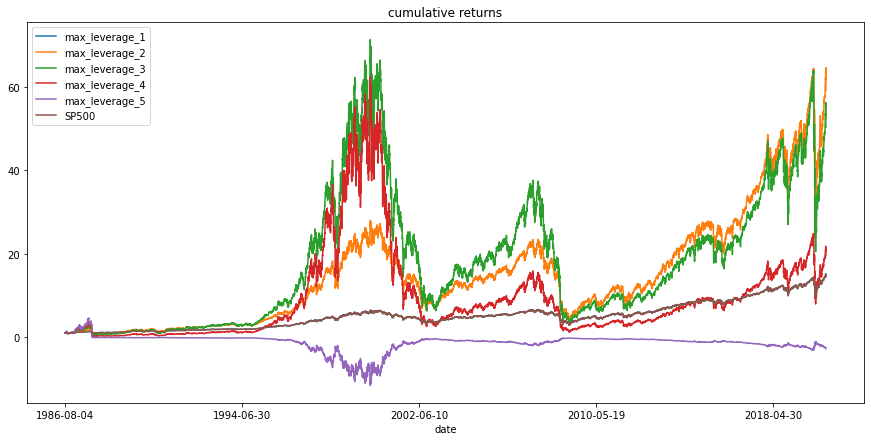

In [8]:
cum_returns = get_cumulative_returns(all_returns_df)

cum_returns.plot(figsize=(15, 7))
plt.title('cumulative returns')

#### 3. Example with multiple securities

So now we are going to see the example of Kelly criterion with a portfolio securities. To do so, I have selected randomly 15 securities from NASDAQ. 


The first thing we will need to do is study their correlations, since if there are correlations between the securities the optimal fraction invested would be other.

In [9]:
companies_df = pd.read_csv('companies.csv', index_col='date', sep=';')
returns_df = companies_df.pct_change()
shift_returns = returns_df.shift(-1)

<AxesSubplot:>

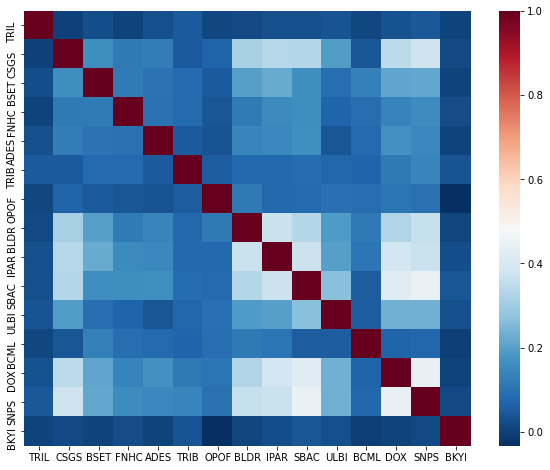

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(returns_df.corr(), cmap="RdBu_r")

Well... we see some correlations, none of them greater than 0.5. Neveretheless is great enough to think that maybe we should calculate the optimal Kelly for both ways.


**Correlated**

If we assume that the securities are correlated, then we will need to do the following.

In [11]:
opt_correlated_kelly = get_kelly(returns_df, correlation=True)

start_date = opt_correlated_kelly.index[0]
shift_returns = shift_returns[start_date:]

In the next graph we can see the evolution of the Kelly criterion for each security in the portfolio. Again, we can see some values greater than 4 and lower than 0. 

C:\Users\Javier\Anaconda3\envs\thesis\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Kelly')

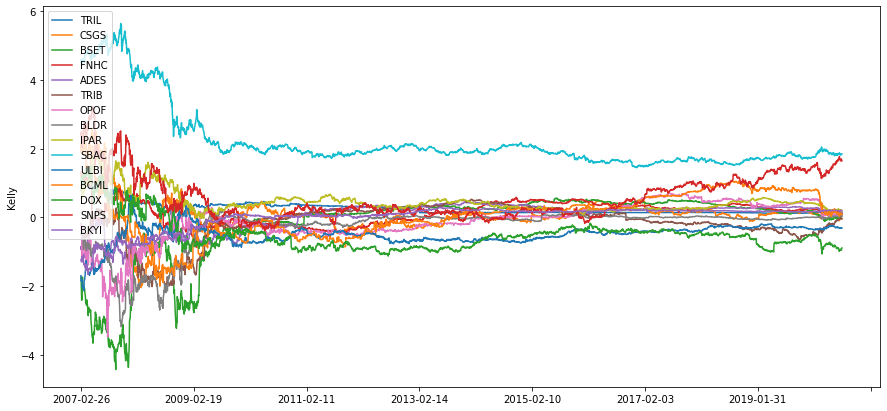

In [12]:
opt_correlated_kelly.plot(figsize=(15, 7))
plt.ylabel('Kelly')

Here we will have aswell a maximum leverage $\alpha$, so in case that the $f_1^* + ... + f_15^* > \alpha$ then:

\begin{equation}
f_i^{**} = \alpha  \frac{f_i^*}{\sum_{i=1}^{15}f_i^*}
\end{equation}

In [13]:
leverages = range(1, 6)
total_returns = pd.DataFrame()

for leverage in leverages:
    kelly_weights = opt_correlated_kelly.copy()
    
    # restrict shortselling
    kelly_weights[kelly_weights<0] = 0

    daily_weights_sum = kelly_weights.sum(axis=1)
    leverage_cond = daily_weights_sum > leverage

    kelly_weights[leverage_cond] = leverage * kelly_weights[leverage_cond].div(daily_weights_sum[leverage_cond], axis=0)

    name = 'max_leverage_' + str(leverage) 
    total_returns[name] = (shift_returns * kelly_weights).sum(axis=1)
    

Furthermore, to compare our results to a *benchmark*, this *benchamrk* can be calculated in different ways, but we are going to focus just in two:


1. If we assume that we divide our money in equally weighted parts and don't touch them again. For example if we have 1500€ we will invest 100€ in each security and leave it there.


2. If we assume that we reinvest everyday all the money in equally weighted parts for all the securities. In this case, you would constantly update the weights, so that all the securities have always the same amount of money.

In [14]:
# invest once and don't touch it again
cum_returns_ew = get_cumulative_returns(shift_returns)
cum_returns_ew = cum_returns_ew / 15
invest_once_equally_weight = cum_returns_ew.sum(axis=1)

# reinvest every day
total_returns['reinvest_equally_weight'] = shift_returns.sum(axis=1) / len(shift_returns.columns)

C:\Users\Javier\Anaconda3\envs\thesis\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'cumulative returns')

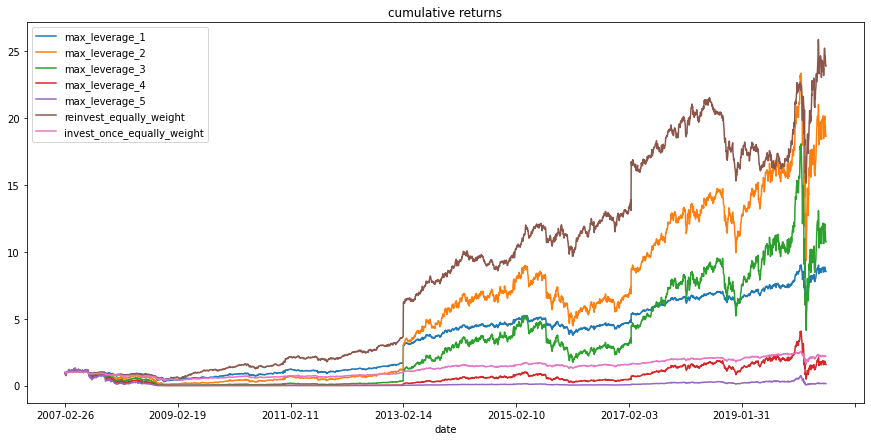

In [15]:
cum_returns = get_cumulative_returns(total_returns)
cum_returns['invest_once_equally_weight'] = invest_once_equally_weight

cum_returns.plot(figsize=(15, 7))
plt.title('cumulative returns')

**Uncorrelated**

If we assume that the securities are not correlated, then the optimal allocation is the same that for one asset allocation.

In [16]:
opt_uncorrelated_kelly = get_kelly(returns_df, correlation=False)
opt_correlated_kelly = opt_correlated_kelly.dropna()

C:\Users\Javier\Anaconda3\envs\thesis\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Kelly')

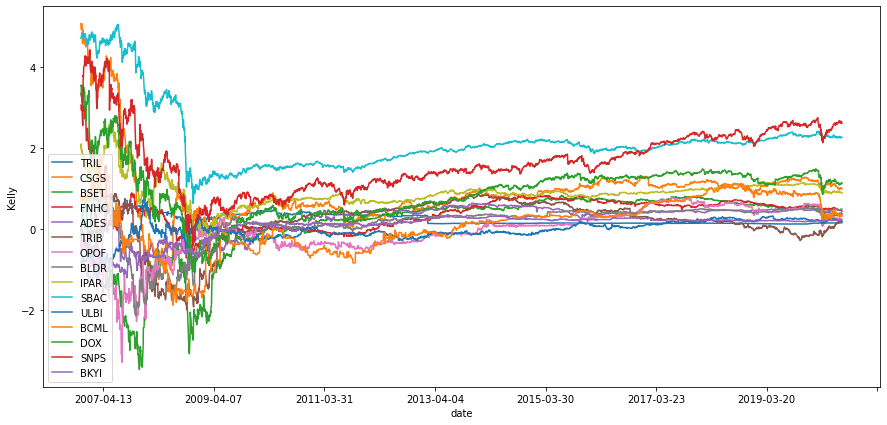

In [17]:
opt_uncorrelated_kelly.plot(figsize=(15, 7))
plt.ylabel('Kelly')

We will do the same, laverages from 1 to 5. Note that now we can short sell as well.  

In [18]:
leverages = range(1, 6)
total_returns = pd.DataFrame()

for leverage in leverages:
    kelly_weights = opt_uncorrelated_kelly.copy()
    
    # restrict shortselling
    kelly_weights[kelly_weights<0] = 0

    daily_weights_sum = kelly_weights.sum(axis=1)
    leverage_cond = daily_weights_sum > leverage

    kelly_weights[leverage_cond] = leverage * kelly_weights[leverage_cond].div(daily_weights_sum[leverage_cond], axis=0)

    name = 'max_leverage_' + str(leverage) 
    total_returns[name] = (shift_returns * kelly_weights).sum(axis=1)
    
total_returns['original'] = shift_returns.sum(axis=1) / len(shift_returns.columns)

In [19]:
# invest once and don't touch it again
cum_returns_ew = get_cumulative_returns(shift_returns)
cum_returns_ew = cum_returns_ew / 15
invest_once_equally_weight = cum_returns_ew.sum(axis=1)

# reinvest every day
total_returns['reinvest_equally_weight'] = shift_returns.sum(axis=1) / len(shift_returns.columns)

C:\Users\Javier\Anaconda3\envs\thesis\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'cumulative returns')

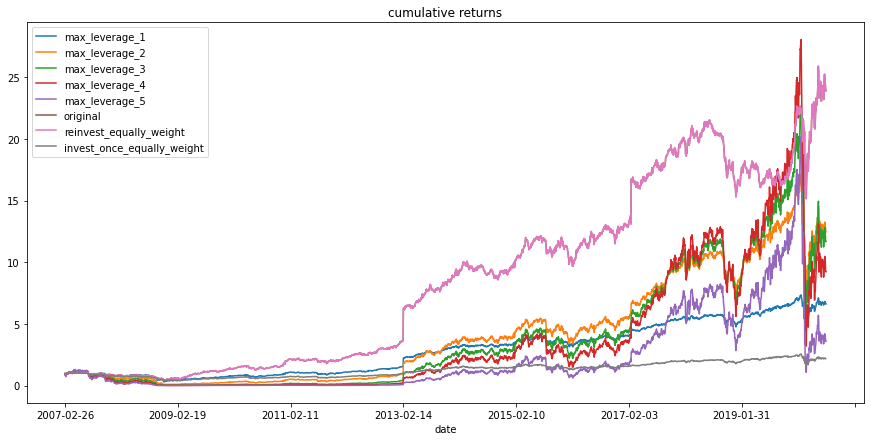

In [20]:
cum_returns = get_cumulative_returns(total_returns)
cum_returns['invest_once_equally_weight'] = invest_once_equally_weight

cum_returns.plot(figsize=(15, 7))
plt.title('cumulative returns')

**Key points from the notebook**


1. First of all, it is really interesting to see the efect of reducing the amount of leverage possible. In most of the cases leverage greater than 5 has end up in losses. 


2. In the other hand, a maximum leverage of 1, even though it doesn't get the best results in terms of cumulative returns, it has lower volatility than the rest, with pretty good results.


#### 4. Discusison, problems and further analysis.

We have made a small review of the Kelly criterion for continuous variables. Nevertheless, there are many questions and further analysis in order to improve our understanding regarding the optimal allocation for our security. Some of them are:

- First of all, to solve the problem mention of high values of Kelly, which lead to riskier possitions, we have limited the amount of possible leverage, nevetheless we could have done other things, such as reducing the Kelly value multiplying all by a constand $C$ such that $0 < C < 1$.

- We know that financial series are not stationary so there is a big issue when estimating the values $m$ and $s^2$. We have decided to estimate this parameters with the expanding mean and variance. Nevertheless, we could try to do it rolling or even try to predict the future variance or returns of the security.

- We also consider that the returns follow a normal distribution, which is actually not the real case (and that's whay in some other papers they advice to use fractional Kelly).

### References


1. Thorp, E. O. (2011). The Kelly criterion in blackjack sports betting, and the stock market. In The Kelly Capital Growth Investment Criterion: Theory and Practice (pp. 789-832).


2. MacLean, L. C., Thorp, E. O., & Ziemba, W. T. (2010). Good and bad properties of the Kelly criterion. Risk, 20(2), 1.


3. Khanna, N. (2016). The Kelly Criterion and the Stock Market.


4. Browne, S., & Whitt, W. (1996). Portfolio choice and the Bayesian Kelly criterion. Advances in Applied Probability, 1145-1176.


5. Davis, M., & Lleo, S. (2013). Fractional Kelly strategies in continuous time: Recent developments. In HANDBOOK OF THE FUNDAMENTALS OF FINANCIAL DECISION MAKING: Part II (pp. 753-787).